In [ ]:
# This shows change in normalization as results of NOT reconstructing the very brightests
# parts of the Fizeau PSF is negligible

# Created 2020 June 6 by E.S.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.convolution import Gaussian2DKernel
from astropy.convolution import convolve

In [2]:
# PSF constants
lambda_over_D_pix = 9.46 # for Airy PSF, 4 um with LBT
fwhm_4um_lbt_airy_pix = 1.028*lambda_over_D_pix # fwhm of a 4 um Airy PSF with the LBT

In [3]:
sci_median_file_name = "data/median_sci_frame.fits" # median
master_frame_file_name = "data/lm_180507_008812.fits" # one science frame

In [4]:
sci_median_frame = fits.getdata(sci_median_file_name, 0, header=False)
master_frame = fits.getdata(master_frame_file_name, 0, header=False)

In [6]:
# make an 'exaggerated' frame
sci_median_frame_exag = np.copy(sci_median_frame)
sci_median_frame_exag[np.where(sci_median_frame > 55000)] = 1.2*sci_median_frame_exag[np.where(sci_median_frame > 55000)]

/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
sci_median_frame_exag

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [22]:
sci_median_frame_exag[np.where(sci_median_frame > 55000)]

/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


array([67100.5078125 , 66852.95390625, 66341.8171875 , 67265.35546875,
       67063.65      , 66098.60625   , 66339.18984375, 67203.0515625 ,
       67004.82890625, 66674.94140625, 66347.78671875])

In [8]:
# now make original science frame variable the new one with 20% increase in sat counts?
sci_median_frame = sci_median_frame_exag

In [9]:
pos_num = 0 ## ## stand-in for now; NEED TO CHANGE LATER
kernel = Gaussian2DKernel(x_stddev=0.5*fwhm_4um_lbt_airy_pix)
smoothed_sci_median_frame = convolve(sci_median_frame, kernel) # smooth sci frame with same kernel
smoothed_adi_frame = convolve(master_frame, kernel)

# find amplitude of host star in SMOOTHED image
center_sci_median_frame = [int(0.5*np.shape(sci_median_frame)[0]),
                           int(0.5*np.shape(sci_median_frame)[1])]
host_ampl = np.nanmax(smoothed_sci_median_frame[center_sci_median_frame[0]-10:center_sci_median_frame[0]+10,
                                       center_sci_median_frame[1]-10:center_sci_median_frame[1]+10])

In [16]:
host_ampl

28663.0896402581

In [11]:
host_ampl

29445.85001238637

In [12]:
2.5*np.log10(28663.0896402581/29445.85001238637)

-0.029252734300282454

In [13]:
np.log10((29445.85001238637-28663.0896402581)/28663.0896402581)

-1.563694170845117

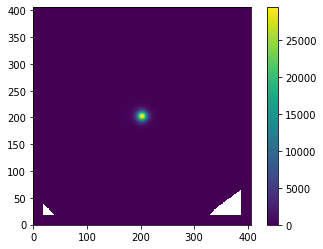

In [30]:
plt.imshow(smoothed_sci_median_frame, origin="lower")
plt.colorbar()
plt.show()